In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline
np.random.seed(1)

In [2]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

In [3]:
def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

In [4]:
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

In [5]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [6]:
# Dataset
X, Y = load_planar_dataset()

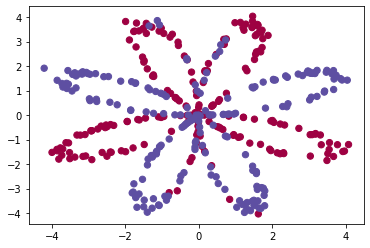

In [7]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [8]:
shape_x = X.shape
shape_y = Y.shape
m = X.shape[1]

print('The Shape of X is: '+str(shape_x))
print('The Shape of Y is: '+str(shape_y))
print(f"I have m = {m} training examples!")

The Shape of X is: (2, 400)
The Shape of Y is: (1, 400)
I have m = 400 training examples!


In [9]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.ravel());

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


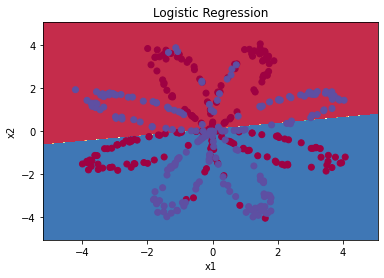

In [10]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [11]:
# Defining Neural Network Structure
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input shape, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return n_x, n_h, n_y

In [24]:
# Initialize the Model Parameters
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing parameters
    W1 -- weight matrix of shape (n_h, n_x)
    b1 -- bias vector of shape (n_h, 1)
    W2 -- weight matrix of shape (n_y, n_h)
    b1 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

In [14]:
def forward_propogation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    paramters -- python dictionary containing parameters
    
    Returns:
    A2 -- The Sigmoid Output of the Second Activation
    cache -- A dictionary containing Z1, A1, Z2, A2
    """
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    
    return A2, cache

In [15]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y), np.log(1-A2))
    cost = -np.sum(logprobs) / m
    assert(isinstance(cost, float))
    return cost

In [26]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1":dW1, "dW2":dW2, "db1": db1, "db2": db2}
    
    return grads

In [27]:
def update_parameters(parameters, grads, learning_rate=1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1":W1, "b1":b1, "W2":W2, "b2":b2}
    
    return parameters

In [28]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    np.random.seed(3)
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(num_iterations):
        A2, cache = forward_propogation(X, parameters)
        
        cost = compute_cost(A2, Y, parameters)
        
        grads = backward_propagation(parameters, cache, X, Y)
        
        parameters = update_parameters(parameters, grads)
        
        if print_cost and i%1000 == 0:
            print(f"Cost after iteration {i}: {cost}")
            
    return parameters

In [29]:
def predict(parameters, X):
    A2, cache = forward_propogation(X, parameters)
    predictions = A2 > 0.5
    return predictions

Cost after iteration 0: 0.6930480201239823
Cost after iteration 1000: 0.2880832935690184
Cost after iteration 2000: 0.254385494073245
Cost after iteration 3000: 0.23386415038952196
Cost after iteration 4000: 0.2267924874485401
Cost after iteration 5000: 0.22264427549299015
Cost after iteration 6000: 0.21973140404281324
Cost after iteration 7000: 0.21750365405131297
Cost after iteration 8000: 0.2194395703629519
Cost after iteration 9000: 0.21855345408675017


Text(0.5, 1.0, 'Decision Boundary for Hidden Layer Size 4')

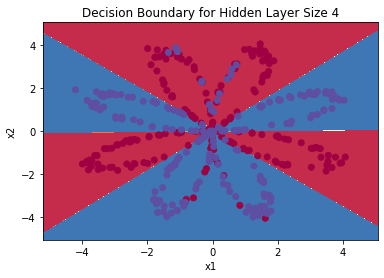

In [30]:
parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)

plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for Hidden Layer Size "+str(4))

In [33]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.5 %
Accuracy for 50 hidden units: 90.25 %


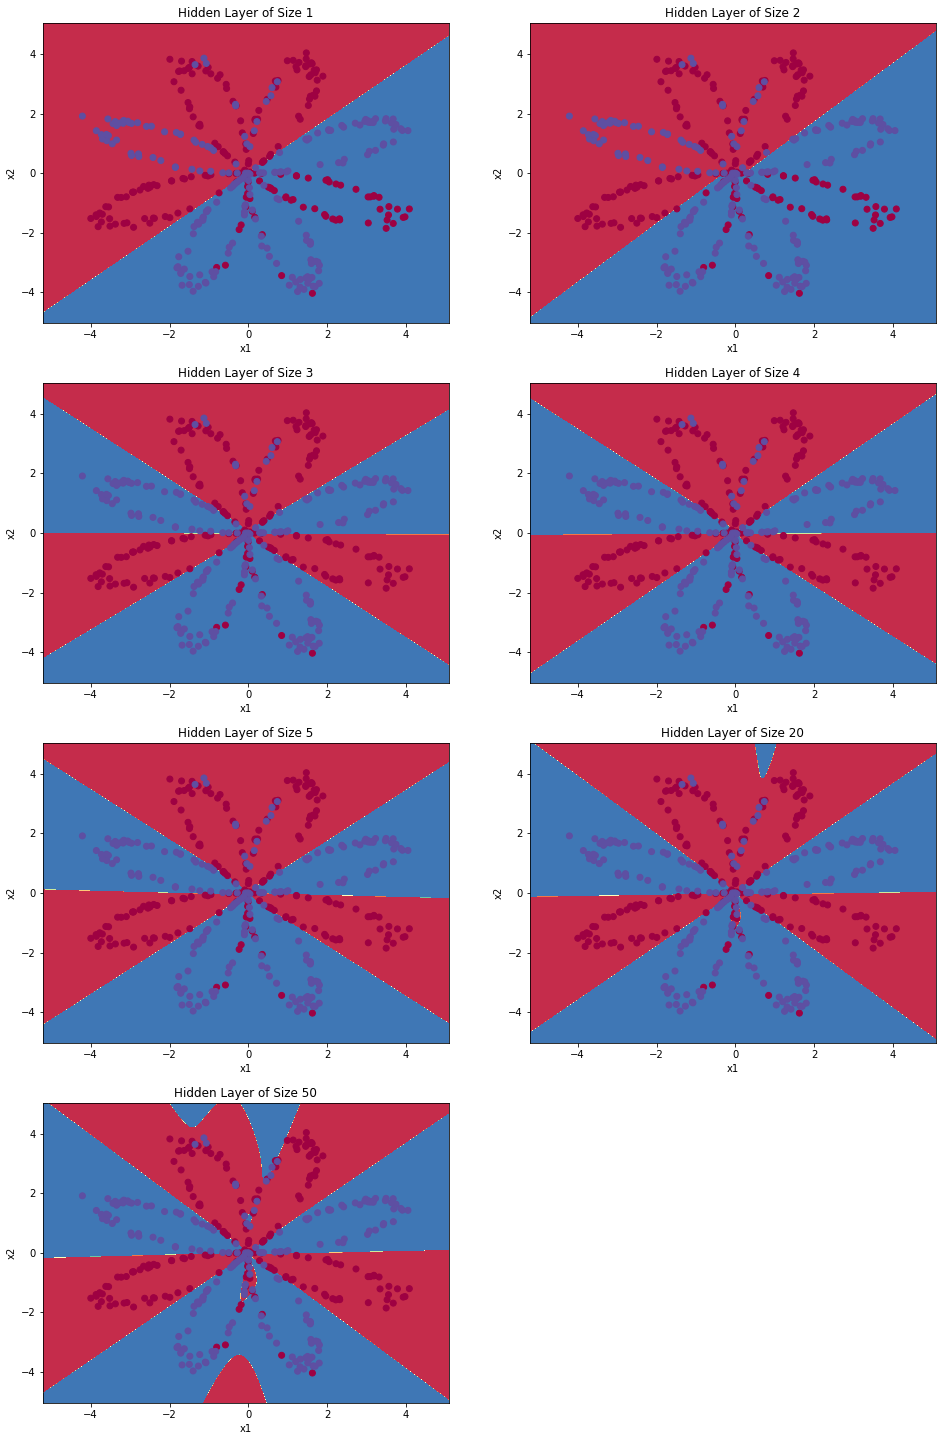

In [34]:
plt.figure(figsize=(16,32))
hidden_layer_sizes = [1,2,3,4,5,20,50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title(f"Hidden Layer of Size {n_h}")
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print(f"Accuracy for {n_h} hidden units: {accuracy} %")